In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [603]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [605]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [606]:
stats = data.describe()
stats=stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [607]:
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [608]:
data['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [609]:
data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [610]:
data['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [611]:
data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [612]:
data['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [613]:
data['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [614]:
data['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [615]:
data['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

#Data Vizualisation

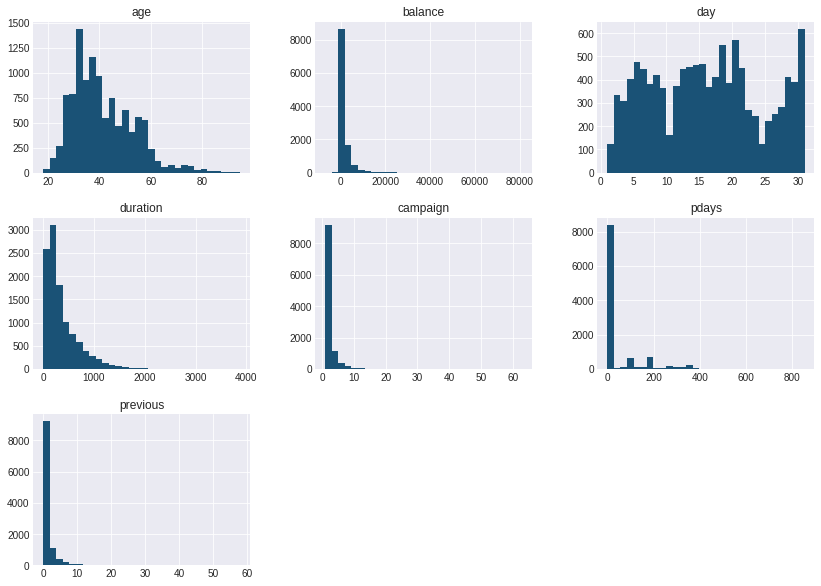

In [616]:
plt.style.use('seaborn-darkgrid')

data.hist(bins=30, figsize=(14,10), color='#1A5276')
plt.show()

##Data Vizualisation with pie chart

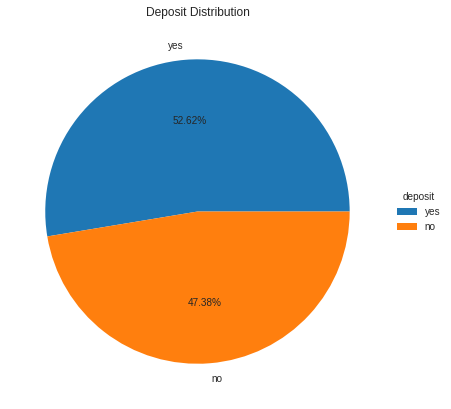

In [617]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

depo = ['yes', 'no']
depo_num = [5873,5289]
                                 
ax.pie(depo_num, labels = depo,autopct='%1.2f%%')
ax.legend(depo,
          title="deposit",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Deposit Distribution")

plt.show()

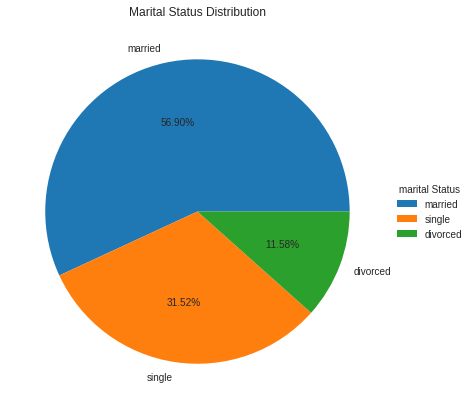

In [618]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

marit = ['married', 'single','divorced']
marit_num = [6351,3518,1293]
                                 
ax.pie(marit_num, labels = marit,autopct='%1.2f%%')
ax.legend(marit,
          title="marital Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Marital Status Distribution")

plt.show()

#Data Vizualisation with boxplot

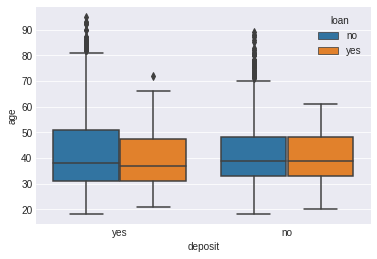

In [619]:
sns.boxplot(x="deposit", y="age", hue="loan", data=data)

plt.show()


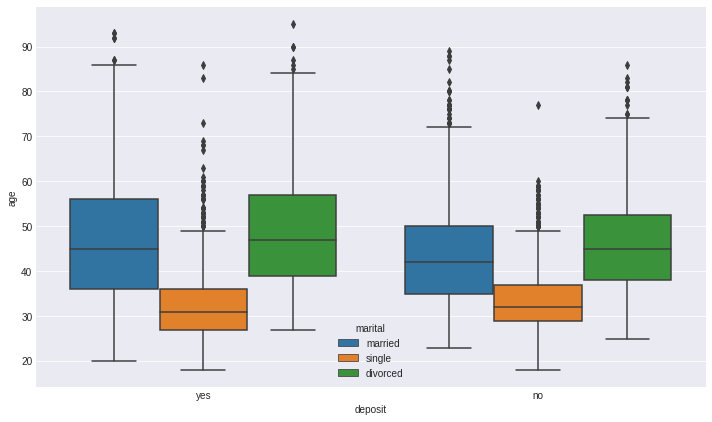

In [620]:
fig=plt.figure(figsize=(12,7))   

sns.boxplot(x="deposit", y="age", hue="marital", data=data)

plt.show()


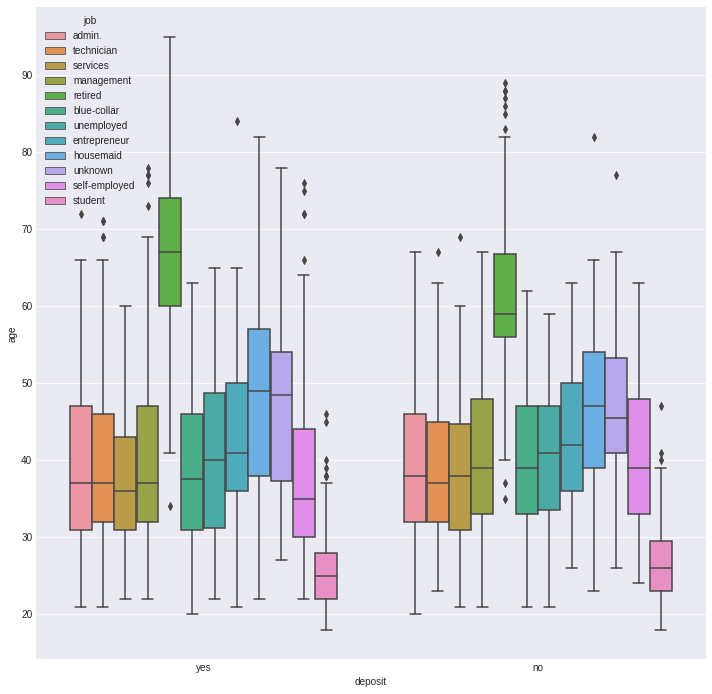

In [621]:
fig=plt.figure(figsize=(12,12))   

sns.boxplot(x="deposit", y="age", hue="job", data=data)

plt.show()


#Data Preprocessing

In [622]:
# I will separate my data into numeric data and categorical data

cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [623]:
data[num_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [624]:
data[cat_cols].head()

,loan,deposit,housing,contact,poutcome,education,marital,default,month,job
0,no,yes,yes,unknown,unknown,secondary,married,no,may,admin.
1,no,yes,no,unknown,unknown,secondary,married,no,may,admin.
2,no,yes,yes,unknown,unknown,secondary,married,no,may,technician
3,no,yes,yes,unknown,unknown,secondary,married,no,may,services
4,no,yes,no,unknown,unknown,tertiary,married,no,may,admin.


In [625]:
# I need to encode my categorical data 
data_Encod = data[cat_cols].apply(LabelEncoder().fit_transform)

In [626]:
data_Encod.head()

,loan,deposit,housing,contact,poutcome,education,marital,default,month,job
0,0,1,1,2,3,1,1,0,8,0
1,0,1,0,2,3,1,1,0,8,0
2,0,1,1,2,3,1,1,0,8,9
3,0,1,1,2,3,1,1,0,8,7
4,0,1,0,2,3,2,1,0,8,0


In [627]:
new_data = data_Encod.join(data[num_cols])
new_data.head()

,loan,deposit,housing,contact,poutcome,education,marital,default,month,job,age,balance,day,duration,campaign,pdays,previous
0,0,1,1,2,3,1,1,0,8,0,59,2343,5,1042,1,-1,0
1,0,1,0,2,3,1,1,0,8,0,56,45,5,1467,1,-1,0
2,0,1,1,2,3,1,1,0,8,9,41,1270,5,1389,1,-1,0
3,0,1,1,2,3,1,1,0,8,7,55,2476,5,579,1,-1,0
4,0,1,0,2,3,2,1,0,8,0,54,184,5,673,2,-1,0


##Heatmap

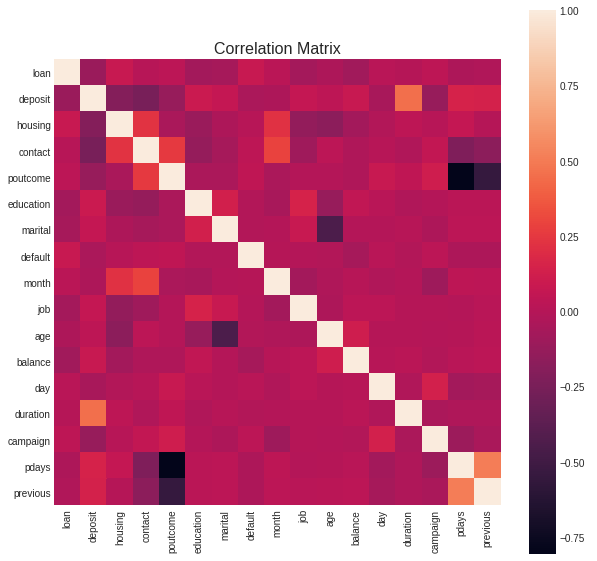

In [628]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(new_data.corr(), vmax=1, square=True)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [629]:
data_cor = new_data.corr()['deposit'][:-1]
feature_list = data_cor[abs(data_cor)>0.1].sort_values(ascending=False)
feature_list

deposit     1.000000
duration    0.451919
pdays       0.151593
loan       -0.110580
poutcome   -0.122369
campaign   -0.128081
housing    -0.203888
contact    -0.249847
Name: deposit, dtype: float64

We notice that there is a strong correlation between the duration of the last contact and the subscription of a term deposit.

#Preprocessing

In [630]:
X = new_data.drop(['deposit'], axis = 1)
y = new_data.deposit.values


In [631]:
X = np.array(X)
y = np.array(y)

In [632]:
X.shape

(11162, 16)

In [633]:
y.shape

(11162,)

In [634]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [635]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler()
X_train = X_std.fit_transform(X_train)
X_valid = X_std.fit_transform(X_valid)

In [636]:
# Construction du model

model = keras.Sequential([layers.Dense(32, input_dim=16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dropout(0.2),
                      layers.Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      layers.Dropout(0.5),
                      layers.Dense(1, activation="sigmoid")])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_117 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_47 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_48 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
___________________________________________________

In [637]:
model.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25)


Epoch 1/25
280/280 [==============================] - 2s 2ms/step - loss: 0.5664 - accuracy: 0.7077 - val_loss: 0.4315 - val_accuracy: 0.8155
Epoch 2/25
280/280 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7990 - val_loss: 0.4143 - val_accuracy: 0.8209
Epoch 3/25
280/280 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8038 - val_loss: 0.4125 - val_accuracy: 0.8182
Epoch 4/25
280/280 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8070 - val_loss: 0.4105 - val_accuracy: 0.8227
Epoch 5/25
280/280 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8103 - val_loss: 0.4130 - val_accuracy: 0.8236
Epoch 6/25
280/280 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8096 - val_loss: 0.4021 - val_accuracy: 0.8231
Epoch 7/25
280/280 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8125 - val_loss: 0.3975 - val_accuracy: 0.8177
Epoch 

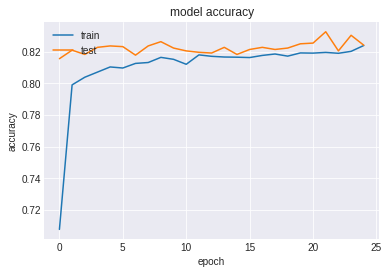

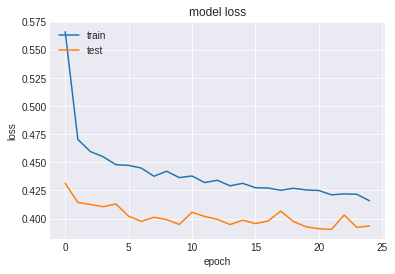

In [638]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [639]:
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)
print('\nTest accuracy:', test_acc *100, '%')

70/70 - 0s - loss: 0.3935 - accuracy: 0.8240

Test accuracy: 82.40035772323608 %


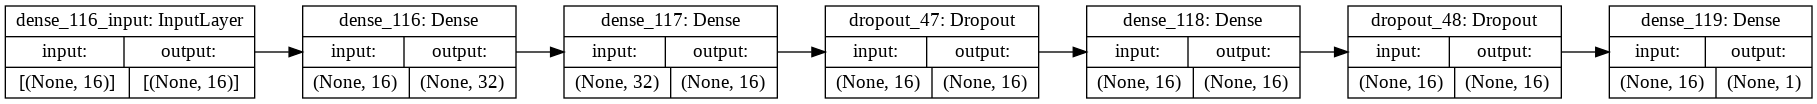

In [640]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")